In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Loading the dataset

In [ ]:
data = pd.read_csv('diabetes.csv', delimiter=',')
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,data.mean(axis=0))
outcome = data.iloc[:,8]
print(data)
print(data.describe().T)



     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

Try to use the softUmput from GitHub open resource but it didn't work

In [ ]:
# from soft_impute import SoftImpute
# clf = SoftImpute(J=1, lambda_=2.0)
# X_test = data.to_numpy().copy()
# fit = clf.fit(X_test)
# imputed = clf.predict(X_test)
# k = imputed[:,0]
# plt.hist(k,bins = [0,2,4,6,8,10,12,14,16]) 
# plt.title("histogram") 
# plt.show()

#Data Normalization

In [ ]:
d = preprocessing.normalize(data.iloc[:,0:8], axis=0)
scaled_df = pd.DataFrame(d, columns = features)
scaled_df = pd.concat([scaled_df, outcome], axis=1)


array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

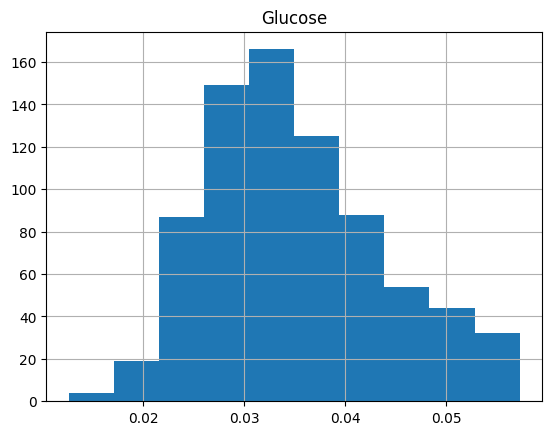

In [ ]:
scaled_df.hist(column="Glucose")

array([[<Axes: title={'center': 'BloodPressure'}>]], dtype=object)

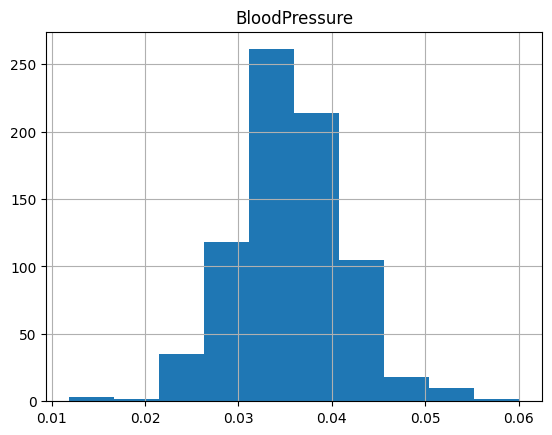

In [ ]:
scaled_df.hist(column="BloodPressure")

In [ ]:
X = scaled_df.iloc[:,0:8].to_numpy()
y = data.iloc[:,8].to_numpy()


#Split the dataset and train the model

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [ ]:
x_train_df = pd.DataFrame(x_train,columns = features)
x_test_df = pd.DataFrame(x_test,columns = features)

In [ ]:
model = Sequential()
model.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 76.91
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 0 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

# Class contrastive analysis: Max Max Max Max - Min Min Min Min

In [ ]:
def max_calcuation(arr):
  max = np.max(arr, axis =0)
  return max

In [ ]:
def min_calcuation(arr):
  min = np.min(arr, axis =0)
  return min

In [ ]:
def max_matrix(arr,model):
  prediction_max = []
  for i in range(len(arr)):
    row_index = 0
    X_single= np.full((70,8),arr[i])
    for m in range(8):
      for j in range(m+1,8):
        for k in range(j+1,8):
          for n in range (k+1, 8):
            X_single[row_index][m] = max[m]
            X_single[row_index][j] = max[j]
            X_single[row_index][k] = max[k]
            X_single[row_index][n] = max[n]
            row_index +=1
    predictions_sub_max = model.predict(X_single).reshape((1,70))
    if len(prediction_max) == 0:
      prediction_max = predictions_sub_max
    else:
      prediction_max = np.concatenate((prediction_max, predictions_sub_max), axis=1)
  prediction_max = prediction_max.reshape((231,70))
  return prediction_max


In [ ]:
def min_matrix(arr,model):
  prediction_min = []
  for i in range(len(arr)):
    row_index = 0
    X_single= np.full((70,8),arr[i])
    for m in range(8):
      for j in range(m+1,8):
        for k in range(j+1,8):
          for n in range (k+1, 8):
            X_single[row_index][m] = min[m]
            X_single[row_index][j] = min[j]
            X_single[row_index][k] = min[k]
            X_single[row_index][n] = min[n]
            row_index +=1
    predictions_sub_min = model.predict(X_single).reshape((1,70))
    if len(prediction_min) == 0:
      prediction_min = predictions_sub_min
    else:
      prediction_min = np.concatenate((prediction_min, predictions_sub_min), axis=1)
  prediction_min = prediction_min.reshape((231,70))
  return prediction_min

In [ ]:
testX = np.copy(x_test)
max = max_calcuation(testX)
min = min_calcuation(testX)
# MaxMax = [[0 for x in range(28)] for y in range(len(x_test))]
print(max)


[0.12001927 0.05696377 0.05319401 0.08034653 0.17805938 0.06461858
 0.15148431 0.07061859]


In [ ]:
prediction_max = max_matrix(x_test,model)
prediction_min = min_matrix(x_test,model)
result = np.subtract(prediction_max, prediction_min)
heatmap_diff = pd.DataFrame(result)

3/3 [==============================] - 0s 5ms/step


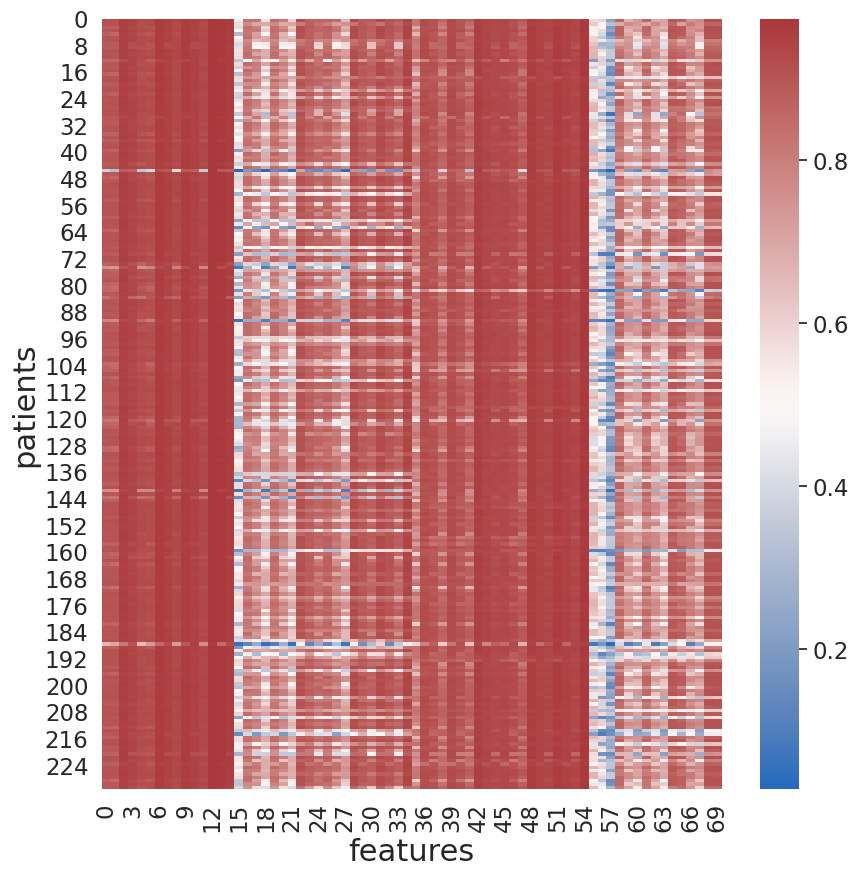

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True))
# ax = sns.heatmap(heatmap_diff,cmap = 'cool')
plt.xlabel('features',fontsize=22)
plt.ylabel('patients',fontsize=22)
plt.savefig('4d_heatmap.eps', format='eps')

##outliers detection

index -0-based:
0 column: redness -> peg & Glu
13 column : blueness -> BP & Skinthickness

everything is tend to be white \\
the outliers are blue \\

column 1: Pregnancies, BloodPressure \\
column 16: BloodPressure, DiabetesPedigreeFunction \\
column 24: Insulin, Age \\

Summary: BloodPressure, Pregnancies, DiabetesPedigreeFunction, Insulin, Age

####changed

In [ ]:
# row_num_double= heatmap_diff[(heatmap_diff.iloc[:,1] < 0.3) & (heatmap_diff.iloc[:,16] < 0.35) &(heatmap_diff.iloc[:,24] < 0.15)].index 
# print(row_num_double)

$features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]$


column 0: preg, glu

column 4: preg, bmi

column 5: preg, dpf

summary: preg[0], glu[1], bmi[5], dpf[6]


column 0: preg, glu

column 10: glu, bmi

column 11: glu, dpf

In [ ]:
row_num_double = heatmap_diff[(heatmap_diff.iloc[:,0] < 0.55)].index 
print(row_num_double)

Int64Index([45], dtype='int64')


In [ ]:
# row_num_double = heatmap_diff[(heatmap_diff.iloc[:,0] < 0.8)&(heatmap_diff.iloc[:,5] < 0.5)].index 
# print(row_num_double)

In [ ]:
# row_num_double = x_test_df[(x_test_df.iloc[:,0] < 0.8)].index 

everything is red \\
the outliers are blue \\
use column 0,5,25 \\
which indicates: \\

column 0: Pregnancies, Glucose \\
column 5: Pregnancies, DiabetesPedigreeFunction \\
column 25: DiabetesPedigreeFunction, BMI \\
summary: Pregnancies, DiabetesPedigreeFunction, Glucose, BMI


In [ ]:
sort = heatmap_diff[heatmap_diff.index.isin(row_num_double)]
print(sort)

          0         1         2         3         4        5         6   \
45  0.375862  0.319862  0.882753  0.864315  0.342696  0.38969  0.906441   

          7         8         9   ...       60        61        62        63  \
45  0.892206  0.412576  0.888833  ...  0.15315  0.696426  0.159249  0.135288   

          64        65        66        67       68        69  
45  0.721878  0.749712  0.232264  0.167862  0.77212  0.739415  

[1 rows x 70 columns]


Find the original test data of outlieres

In [ ]:
filter = pd.DataFrame(x_test[heatmap_diff.index.isin(row_num_double)],columns = features)
print(filter)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.0  0.051785       0.038418       0.080347  0.003351  0.064619   

   DiabetesPedigreeFunction       Age  
0                  0.151484  0.025586  



summary: preg[0], glu[1], bmi[5], dpf[6]

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

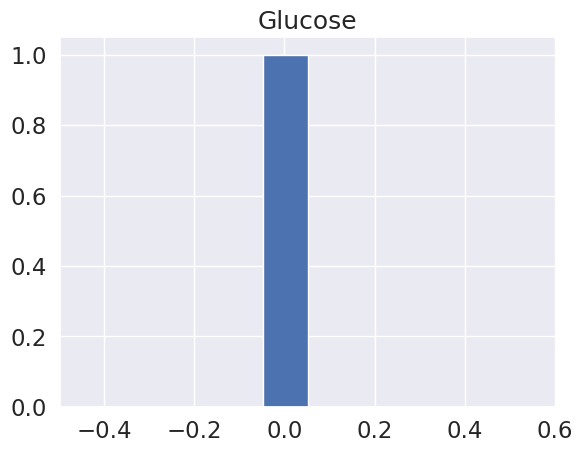

In [ ]:
filter.hist(column="Glucose")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

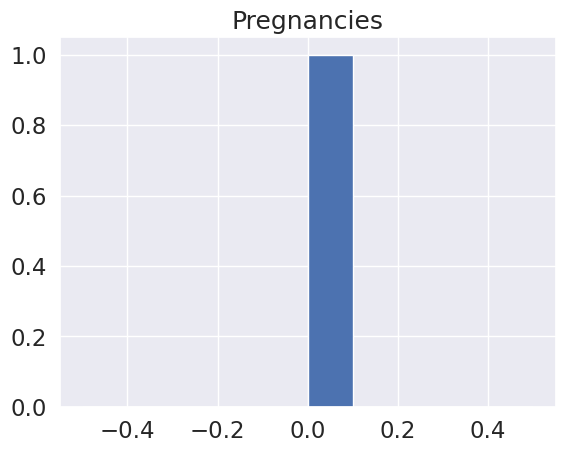

In [ ]:
filter.hist(column="Pregnancies")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

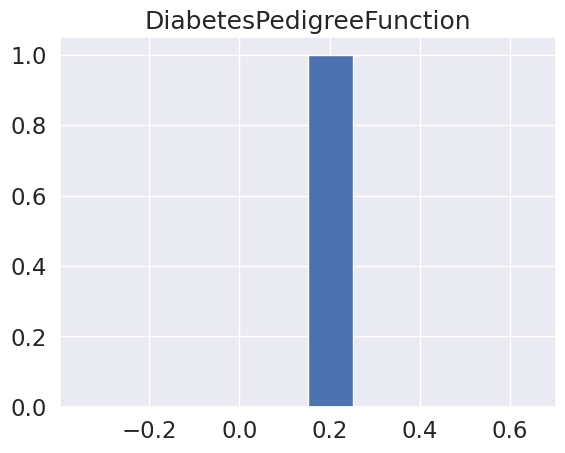

In [ ]:
filter.hist(column="DiabetesPedigreeFunction")

In [ ]:
import statsmodels.stats.api as sms
interval = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean(), axis=0)
print(interval)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0          NaN      NaN            NaN            NaN      NaN  NaN   
1          NaN      NaN            NaN            NaN      NaN  NaN   

   DiabetesPedigreeFunction  Age  
0                       NaN  NaN  
1                       NaN  NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in double_scalars
  return std / np.sqrt(self.sum_weights - 1)


In [ ]:
import statsmodels.stats.api as sms
confid = filter.apply(lambda x: sms.DescrStatsW(x).tconfint_mean())
confindence_interval= confid.to_numpy()
low_bd = confindence_interval[0]
high_bd = confindence_interval[1]


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in double_scalars
  return std / np.sqrt(self.sum_weights - 1)


In [ ]:
print(low_bd)
print(high_bd)

[nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan]


features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"] 

Summary: BloodPressure, Pregnancies, DiabetesPedigreeFunction, Insulin, Age


array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

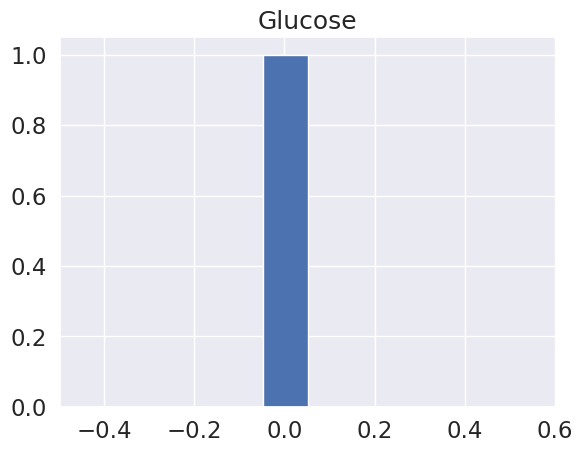

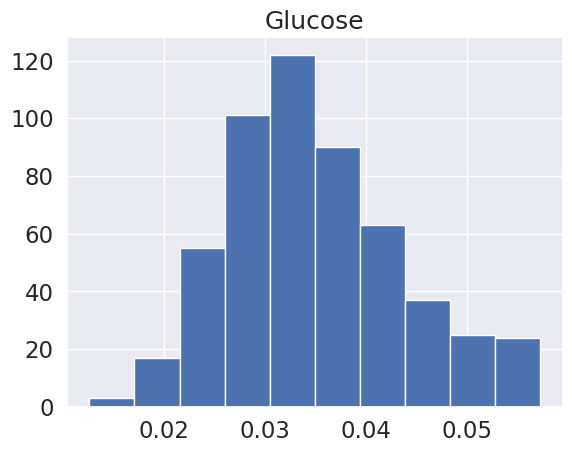

In [ ]:
filter.hist(column="Glucose")
x_train_df.hist(column="Glucose")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

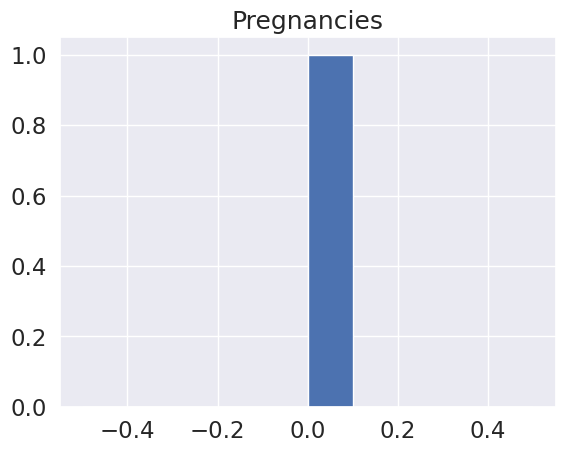

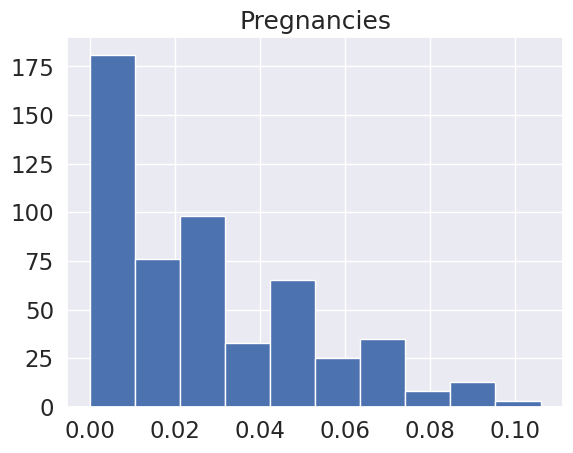

In [ ]:
filter.hist(column="Pregnancies")
x_train_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

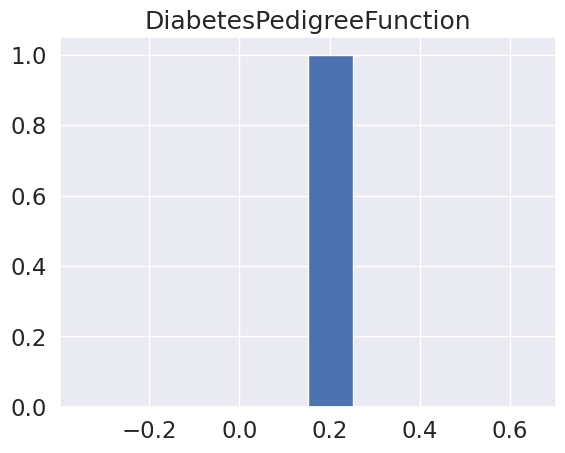

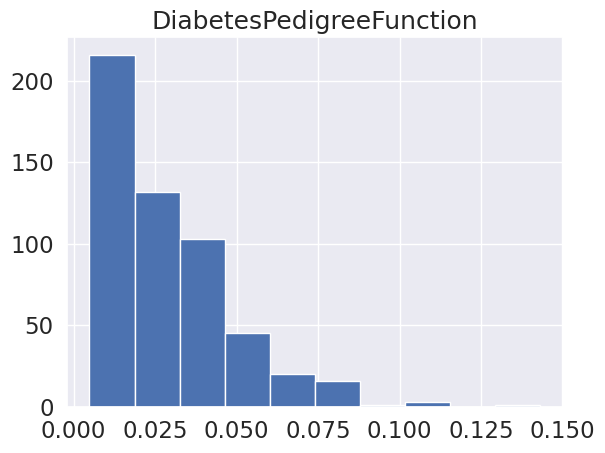

In [ ]:

filter.hist(column="DiabetesPedigreeFunction")
x_train_df.hist(column="DiabetesPedigreeFunction")

####changed!

summary: preg[0], glu[1], bmi[5], dpf[6]

In [ ]:
# train_ref = x_train_df[((x_train_df.iloc[:,0] < high_bd[0]) & (x_train_df.iloc[:,0] > low_bd[0]))  & (x_train_df.iloc[:,1] < high_bd[1]) & (x_train_df.iloc[:,1] > low_bd[1])  & (x_train_df.iloc[:,6] < high_bd[6]) & (x_train_df.iloc[:,6] > low_bd[6])].index 

train_ref = x_train_df[ (x_train_df.iloc[:,1] < high_bd[1]) & (x_train_df.iloc[:,1] > low_bd[1]) & (x_train_df.iloc[:,0] < high_bd[0]) & (x_train_df.iloc[:,0] > low_bd[0])].index 

select = train_ref.values
print(len(select))

0


In [ ]:
train_clean_data = x_train_df[~x_train_df.index.isin(train_ref)]
print(train_clean_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.035300  0.012659       0.030537       0.026191  0.019098  0.027196   
1       0.070600  0.037113       0.037433       0.035710  0.029198  0.039054   
2       0.028240  0.042579       0.029552       0.034434  0.076106  0.033615   
3       0.091779  0.044017       0.043343       0.047188  0.033506  0.044167   
4       0.007060  0.036825       0.023642       0.057390  0.046429  0.044058   
..           ...       ...            ...            ...       ...       ...   
532     0.028240  0.037113       0.042358       0.025507  0.064618  0.038184   
533     0.028240  0.027331       0.031522       0.026191  0.019098  0.034811   
534     0.028240  0.027906       0.029552       0.029333  0.019098  0.030678   
535     0.042360  0.035962       0.038418       0.039536  0.019098  0.030025   
536     0.056480  0.056388       0.037433       0.036985  0.067012  0.040795   

     DiabetesPedigreeFunction       Age

In [ ]:
y_train_df = pd.DataFrame(y_train)
print(y_train_df)

     0
0    0
1    0
2    1
3    0
4    1
..  ..
532  0
533  1
534  0
535  1
536  1

[537 rows x 1 columns]


In [ ]:
y_train_clean_data = y_train_df[~y_train_df.index.isin(train_ref)]

In [ ]:
print(y_train_clean_data)

     0
0    0
1    0
2    1
3    0
4    1
..  ..
532  0
533  1
534  0
535  1
536  1

[537 rows x 1 columns]


#Train new model

In [ ]:
model_clean = Sequential()

model_clean.add(Dense(12,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), input_shape=(8,), activation='relu'))
model_clean.add(Dense(8,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='relu'))
model_clean.add(Dense(1,kernel_initializer = tf.keras.initializers.glorot_uniform(seed=6), activation='sigmoid'))


model_clean.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_clean.fit(train_clean_data, y_train_clean_data, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
# test DS
#training error
_, accuracy = model_clean.evaluate(train_clean_data, y_train_clean_data, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

predictions = (model_clean.predict(x_test) > 0.5).astype(int)

# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))

Accuracy: 76.54
8/8 [==============================] - 0s 2ms/step
[0.042359742733119723, 0.026468013734211867, 0.030537300807401756, 0.04081093651464417, 0.030155216874819788, 0.034811354622936566, 0.005320730020922629, 0.047079059916829195] => 0 (expected 0)
[0.0352997856109331, 0.037975845792564855, 0.039402968783744205, 0.02619100303991568, 0.019098179371178546, 0.029154509496709377, 0.011643009222254223, 0.07061858987524379] => 0 (expected 0)
[0.021179871366559862, 0.030495754954635412, 0.03546267190536978, 0.02619100303991568, 0.019098179371178546, 0.028066654664742608, 0.012957542521540988, 0.02763336125553018] => 0 (expected 0)
[0.028239828488746482, 0.02848188434442364, 0.033492523466182575, 0.048462987111139944, 0.019098179371178546, 0.03568163848850998, 0.009076539447456249, 0.03377410820120355] => 0 (expected 0)
[0.028239828488746482, 0.027618796940047166, 0.02758207814862094, 0.021680810023404714, 0.011727028784652139, 0.02262738050490877, 0.021282920083690517, 0.026609903

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

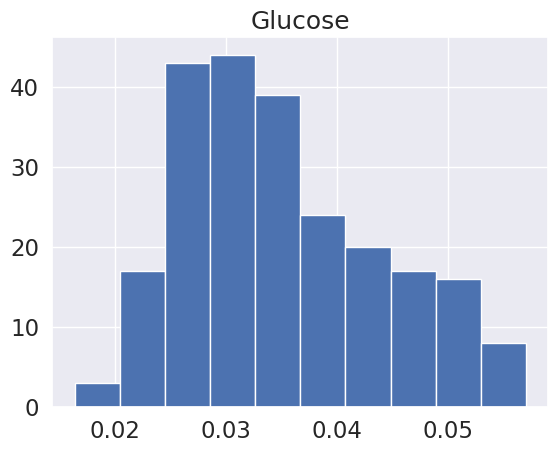

In [ ]:
x_test_df.hist(column="Glucose")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

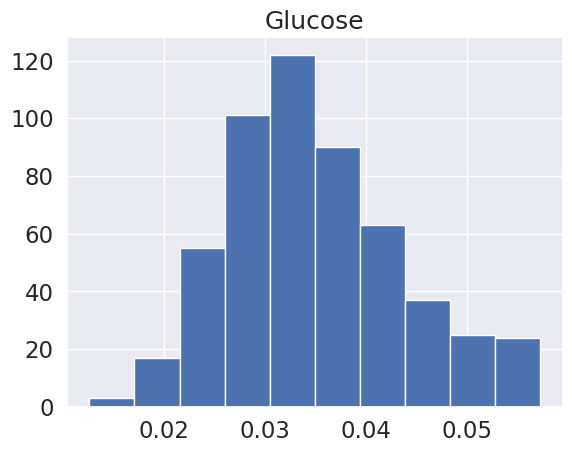

In [ ]:
x_train_df.hist(column="Glucose")

array([[<Axes: title={'center': 'Glucose'}>]], dtype=object)

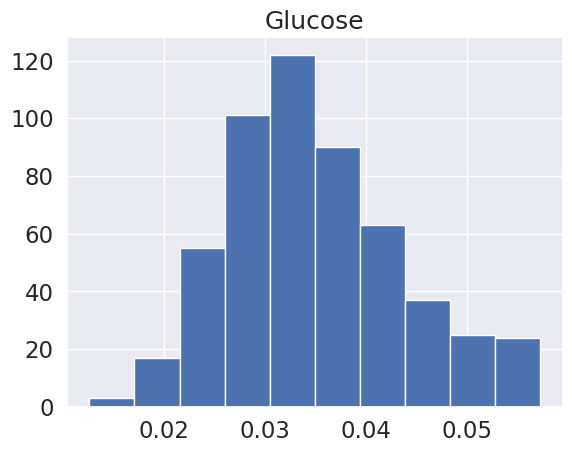

In [ ]:
train_clean_data.hist(column="Glucose")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

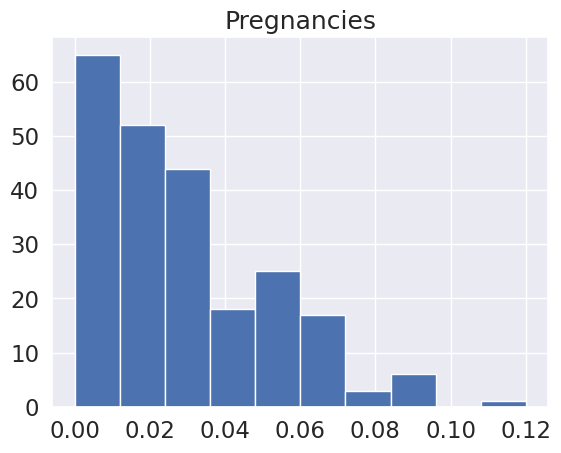

In [ ]:
x_test_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'Pregnancies'}>]], dtype=object)

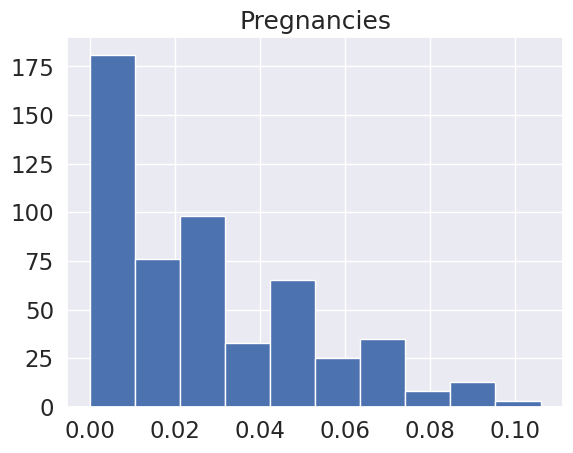

In [ ]:
x_train_df.hist(column="Pregnancies")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

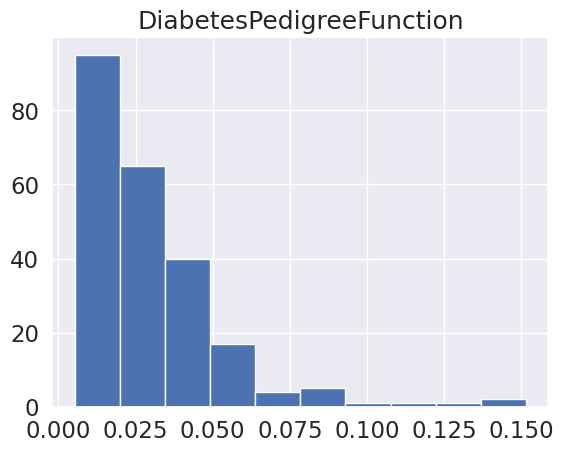

In [ ]:
x_test_df.hist(column="DiabetesPedigreeFunction")

array([[<Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

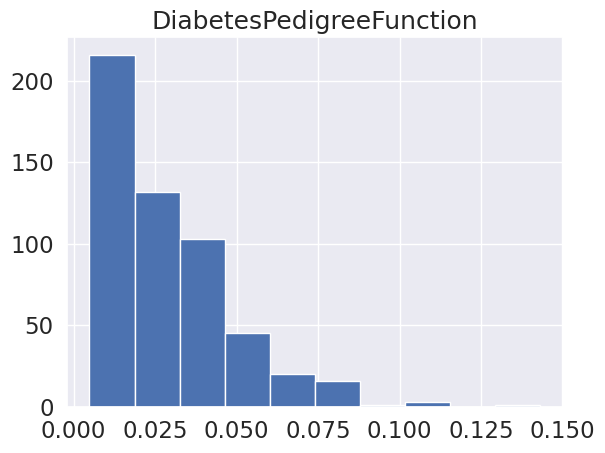

In [ ]:
x_train_df.hist(column="DiabetesPedigreeFunction")

In [ ]:
# MaxMax_cleaned = [[0 for x in range(28)] for y in range(len(x_test))]

In [ ]:
prediction_max_clean = []
for i in range(len(x_test)):
    row_index = 0
    X_single= np.full((28,8),x_test[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = max[m]
       X_single[row_index][j] = max[j]
       row_index +=1
    predictions_sub_max = model_clean.predict(X_single).reshape((1,28))
    if len(prediction_max_clean) == 0:
      prediction_max_clean = predictions_sub_max
    else:
      prediction_max_clean = np.concatenate((prediction_max_clean, predictions_sub_max), axis=1)
prediction_max_clean = prediction_max_clean.reshape((231,28))

1/1 [==============================] - 0s 22ms/step


In [ ]:
prediction_min_clean = []
for i in range(len(x_test)):
    row_index = 0
    X_single= np.full((28,8),x_test[i])
    for m in range(8):
      for j in range(m+1,8):
       X_single[row_index][m] = min[m]
       X_single[row_index][j] = min[j]
       row_index +=1
    predictions_sub_min = model_clean.predict(X_single).reshape((1,28))
    if len(prediction_min_clean) == 0:
      prediction_min_clean = predictions_sub_min
    else:
      prediction_min_clean = np.concatenate((prediction_min_clean, predictions_sub_min), axis=1)
prediction_min_clean = prediction_min_clean.reshape((231,28))

1/1 [==============================] - 0s 38ms/step


In [ ]:
# prediction_max_clean = max_matrix(x_test,model_clean)
# prediction_min_clean = min_matrix(x_test,model_clean)
result_clean = np.subtract(prediction_max_clean, prediction_min_clean)
heatmap_diff_clean = pd.DataFrame(result_clean)

Text(83.25, 0.5, 'difference')

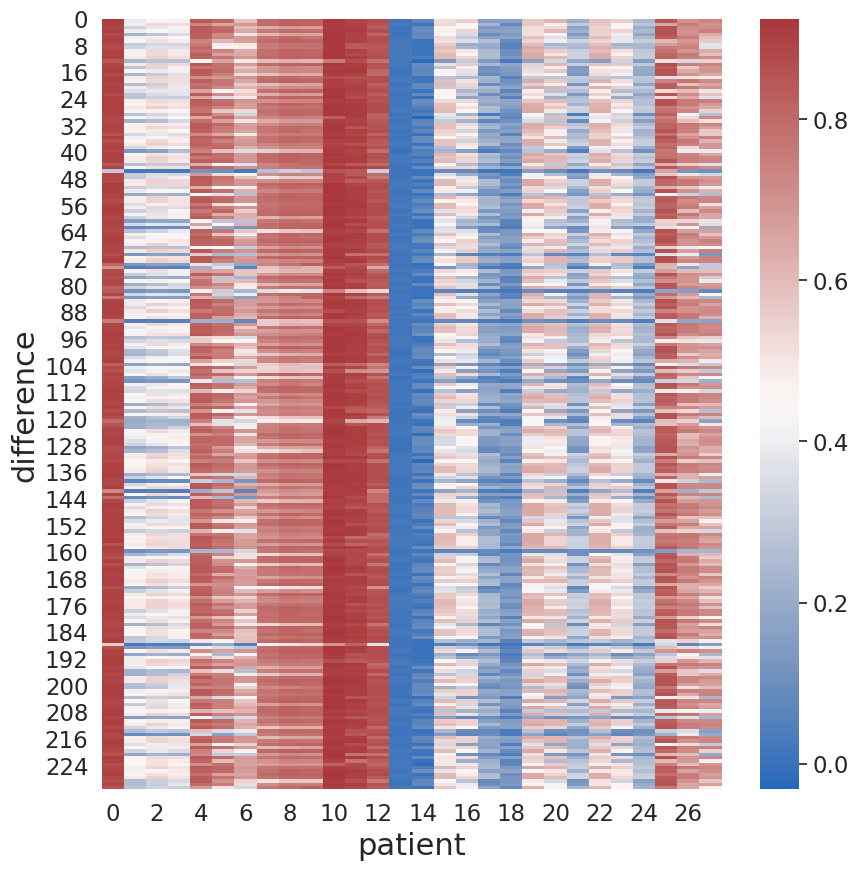

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

# sns.heatmap(heatmap_diff,
#             cmap='coolwarm',
#             annot=True,
#             fmt='.5g',
#             vmax=1)
# ax = sns.heatmap(heatmap_diff,cmap = sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)
ax = sns.heatmap(heatmap_diff_clean,cmap = sns.color_palette("vlag", as_cmap=True))
# ax = sns.heatmap(heatmap_diff,cmap = 'cool')
plt.xlabel('features',fontsize=22)
plt.ylabel('patients',fontsize=22)

In [ ]:
print(heatmap_diff.iloc[[45]])
print(heatmap_diff_clean.iloc[[45]])

          0         1         2         3         4        5         6   \
45  0.375862  0.319862  0.882753  0.864315  0.342696  0.38969  0.906441   

          7         8         9   ...       60        61        62        63  \
45  0.892206  0.412576  0.888833  ...  0.15315  0.696426  0.159249  0.135288   

          64        65        66        67       68        69  
45  0.721878  0.749712  0.232264  0.167862  0.77212  0.739415  

[1 rows x 70 columns]
          0         1         2        3         4         5         6   \
45  0.293466  0.018038  0.025891  0.02103  0.123186  0.102529  0.025422   

          7         8         9   ...        18        19        20        21  \
45  0.268089  0.322281  0.283463  ...  0.012457  0.151758  0.100161  0.022824   

          22        23        24       25        26        27  
45  0.109752  0.089096  0.018219  0.65341  0.130423  0.104237  

[1 rows x 28 columns]


####changed

In [ ]:
# row_num_double = heatmap_diff[(heatmap_diff.iloc[:,0] < 0.8)&(heatmap_diff.iloc[:,5] < 0.5)].index 

In [ ]:
check_row_num_double= heatmap_diff_clean[(heatmap_diff_clean.iloc[:,0] < 0.55)].index 

In [ ]:
print(check_row_num_double.values)

[45]


In [ ]:
print(row_num_double)

Int64Index([45], dtype='int64')
